In [ ]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map


# block_coordinates = [(0,0),(0,5),(5,5),(5,0)]
block_coordinates = [(0,0),(0,1),(1,1),(1,0)]

# print(list(block_coordinates[3]))
node_numbers = [100, 100]

space = Mesh(block_coordinates, node_numbers) #it seems like a one block. Build more sopisticated block type structures
# space.nonuniform_block_mesh_2D(-1.2, -1.4)
# space.nonuniform_mesh_2D(-1.2, -1.4)

#|----------------------------------------------
a, b = space.nonuniform_block_mesh_2D(1, 1)

circle = object()
rectangle = object()
bl = object()


# circle.circle(0.15, (0.4,0.4))
property_map = Map(space)
# rectangle.rectang(0.9, 0.2, (0.65,0.4))
# property_map.create_object(circle)
# property_map.create_object(rectangle)
# rectangle.rectang(1.0, 0.05, (0.5,0.1))
# property_map.create_object(rectangle)
property_map.show()
#|-----------------------------------------------

# property_map.show()
# circle.circle(0.4, (3.4,2.4))
# space.create_object(circle)
# circle.circle(0.4, (2.4,1.4))
# space.create_object(circle)
#


BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'N'}
BCs_values = {'W': 1, 'S': 0, 'E': 0.1, 'N': 0}


solution = PDE_2D_Solver(space,BCs)
solution.solver(BCs_values, "potensial", property_map, 1.4, 1e-2, itteration_type="nodebynode")

# solution.countour()

# compt_dom = Mesh(block_coordinates, node_numbers)
# compt_dom.uniform_block_mesh_2D()

# compt_dom.plot2D()
# space.plot2D()
# compt_dom.Jacobi(a, b)
# print(compt_dom.Jacobian)

# print(OneDcentraldiff(compt_dom.matricies[0], a))
# print(OneDcentraldiff(compt_dom.matricies[0], b, axis=1))
# print(OneDcentraldiff(compt_dom.matricies[1], a))
# print(OneDcentraldiff(compt_dom.matricies[1], -b, axis=1))
# compt_dom.matricies[1] 




In [ ]:
solution.velocityfield("stream")
solution.plot2D("stream")
solution.stream()
solution.quiver()

In [ ]:
solution.velocityfield("potensial")
solution.plot2D("potensial")
solution.streamplot()
solution.quiver()
phii = solution.solution
a = solution.velocity[:,:,0]
cont = solution.continuity

In [ ]:
Uinf = np.mean(-solution.velocity[:,:,0])
nu = 1.81e-2
x = np.linspace(0.001,1,(node_numbers[0]))
Re = Uinf*x/nu
delta = 5 * x / np.sqrt(Re)
delta_idx = np.round(delta*len(delta))


bl.boundary_layer(delta_idx)
property_map.create_object(bl)
property_map.show()

In [ ]:
solution_BL = PDE_2D_Solver(space,BCs)
solution_BL.solver(BCs_values, "potensial", property_map, 1.4, 1e-5, itteration_type="nodebynode")

solution_BL.velocityfield("potensial")
solution_BL.plot2D("potensial")
solution_BL.streamplot()
solution_BL.quiver()
phii = solution.solution
a = solution.velocity[:,:,0]
cont = solution.continuity

areea = property_map.area

Iteration:  0 Error is:  0.0 0.0
Iteration:  1000 Error is:  0.010122684333038645 0.013516074755583585
Iteration:  2000 Error is:  0.0017567231831703278 0.0022851766209925906
Iteration:  3000 Error is:  0.0002850936365335066 0.00043356230728219813
Iteration:  4000 Error is:  7.456339150735403e-05 0.00010940048242780165
Iteration:  5000 Error is:  2.217506867885355e-05 3.057590112431896e-05
Iteration:  6000 Error is:  6.836915120711495e-06 8.820658770725132e-06
Iteration:  7000 Error is:  2.1365894085079162e-06 2.5791305160449696e-06
Iteration:  8000 Error is:  6.700029964168408e-07 7.620277462372371e-07
Iteration:  9000 Error is:  2.0991536420211787e-07 2.270953993743774e-07
Max iteration reached. Error is:  6.569822308399864e-08 6.824270171179592e-08


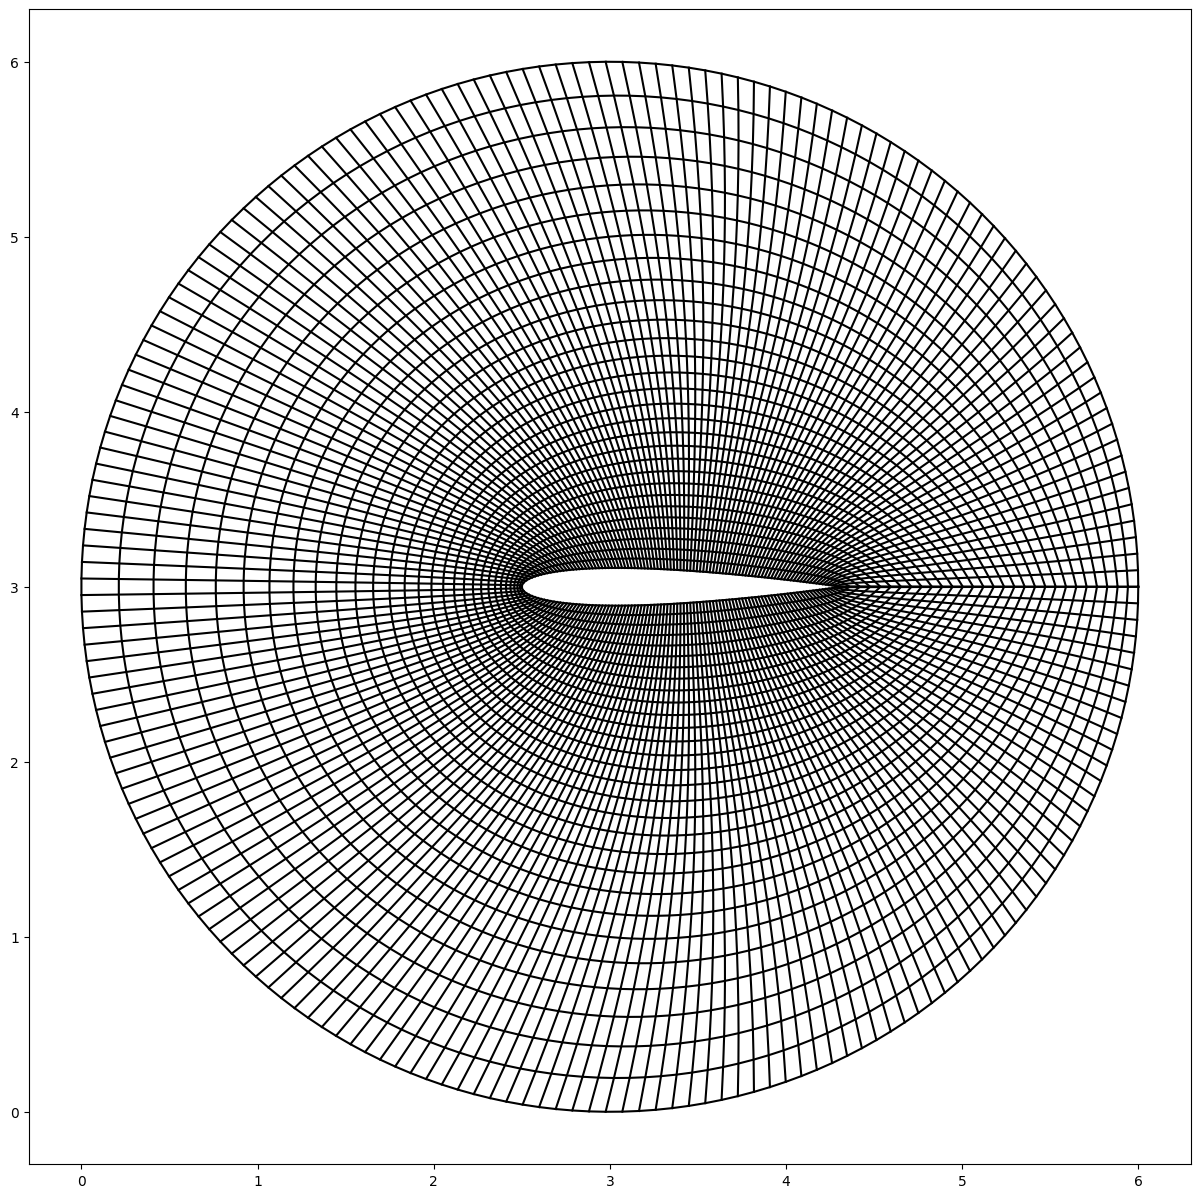

(3, 30)
(30, 3)


ValueError: could not broadcast input array from shape (28,1) into shape (1,28)

In [1]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from Domain import ElippticMesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map
import scipy as sp
from importtools import import_geometry
from solvers import eliptic_PDE_solver, Periodic_a_b_c


def circles(x, y, r):
    th = np.linspace(0, 2 * np.pi, 200)
    xunit = r * np.cos(th) + x
    yunit = r * np.sin(th) + y
    circle_list = np.array([xunit, yunit]).T
    return circle_list

naca0012 = import_geometry('naca0012.txt')
naca0012 = closeshape_interpolation(naca0012, 200)

circleee = circles(3, 3, 3)

naca0012[:,:] = naca0012[:,:] * 1.8
naca0012[:,0] += 2.5

naca0012[:,1] += 3

node_numbers = [200, 30]
space_trial = ElippticMesh(node_numbers, naca0012, circleee) 
space_trial.create_elipticmesh()
a, b, c = space_trial.alpha, space_trial.beta, space_trial.gamma
space_trial.plot_mesh()

Vinf = 1
AOA = np.pi / 10
# Out_psi = - space_trial.Y[-1,:] * Vinf * np.sin(AOA) + space_trial.X[-1,:] * Vinf * np.cos(AOA)
Out_psi = - space_trial.X[-1, :] * Vinf * np.sin(AOA) + space_trial.Y[-1, :] * Vinf * np.cos(AOA)

BCvalues = {'Out': Out_psi, 'In': 0, 'Cut1': 0, 'Cut2': 0}
stream_naca0012 = eliptic_PDE_solver(space_trial, BCvalues)

X = space_trial.X
Y = space_trial.Y

X_temp = np.concatenate((np.reshape([X[:, -2]], (X.shape[0], 1)), X[:, :2]), 1)
Y_temp = np.concatenate((np.reshape([Y[:, -2]], (Y.shape[0], 1)), Y[:, :2]), 1)
alpha_temp, beta_temp, gamma_temp = Periodic_a_b_c(X_temp, Y_temp)

BCcut = stream_naca0012.solver()
stream_naca0012.plot2D()
stream_naca0012.contour()

psi = stream_naca0012.solution



# block_coordinates = [(0,-0.8),(0,0.8),(3.5,0.8),(3.5,-0.8)]
# node_numbers = [200, 300]
# space_trial = Mesh(block_coordinates, node_numbers) 

# a, b = space_trial.uniform_block_mesh_2D()



# airfoil = object()
# airfoil.airfoil(naca0012, scale=2.3)
# airfoil_map = Map(space_trial)
# airfoil_map.create_object(airfoil)
# airfoil_map.show()

# area_matrix = airfoil_map.area


# BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'N'}
# BCs_values = {'W': 1, 'S': 0, 'E': 0, 'N': 0}

# solution = PDE_2D_Solver(space_trial,BCs)
# solution.solver(BCs_values, "potensial", airfoil_map, 1.5, 0.12, itteration_type="nodebynode")

# solution.velocityfield("potensial")
# solution.plot2D("potensial")
# solution.stream()
# solution.quiver()




In [ ]:
import numpy as np
import pickle as pkl

#save the output data solution.solution to a file. the file name contains the solution type and the number of nodes, the object name solved and the BCs, and the BCs values.
#use parameters to change the file name 

def save_data(solution, solution_type, BCs, BCs_values, object_name, node_numbers):
    
    file_name = solution_type + "_" + str(node_numbers[0]) + "_" + str(node_numbers[1]) + "_" + object_name + "_"
    np.save(file_name, solution)
    print("data saved to file: " + file_name)

#load the data from the file
def load_data(file_name):
    data = np.loadtxt(file_name, delimiter=",")
    print("data loaded from file: " + file_name)
    return data

#save the data to a file
# save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil", node_numbers)
save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil_smalled", node_numbers)

# with open("airfoil.pkl", "wb") as f:
    # pkl.dump(solution, f)






In [ ]:
import pickle as pkl
with open("airfoil.pkl", "rb") as f:
    solution_temp = pkl.load(f)

In [ ]:
solution_temp.velocityfield("potensial")
solution_temp.plot2D("potensial")
solution_temp.stream()
solution_temp.quiver()


In [ ]:
# a = airfoil_map.area

X = space_trial.X

print(np.shape(X[:, :2]))
print(np.shape(X[:, -2]))
print(np.shape(X[:, -2].reshape((X.shape[0], 1))))

X_temp = np.concatenate((np.reshape([X[:, -2]], (X.shape[0], 1)), X[:, :2]), 1)


